In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras import optimizers

Using TensorFlow backend.


In [2]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
valid_images = []
valid_labels = []
for i in range(5000):
    valid_images.append(test_images[i])
    valid_labels.append(test_labels[i])

test_images_5000 = []
test_labels_5000 = []
for i in range(5000):
    test_images_5000.append(test_images[5000+i])
    test_labels_5000.append(test_labels[5000+i])
  

test_images_5000 = np.array(test_images_5000)
test_labels_5000 = np.array(test_labels_5000)
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)


In [5]:
#Train, valid, test는 6:2:2로 나누는게 효과적.. 나는 10:1:1로 나눔

print("Train samples:", train_images.shape, train_labels.shape)
print("Valid samples :", valid_images.shape, valid_labels.shape)
print("Test samples:", test_images_5000.shape, test_labels_5000.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Valid samples : (5000, 32, 32, 3) (5000, 1)
Test samples: (5000, 32, 32, 3) (5000, 1)


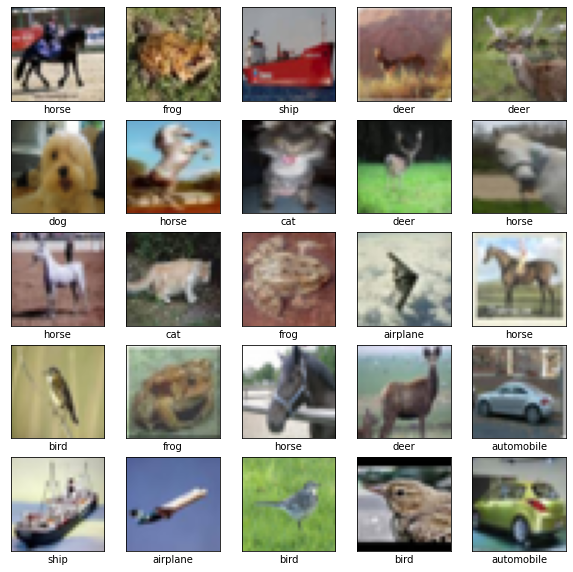

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_5000[i])
    plt.xlabel(class_names[test_labels_5000[i][0]])
plt.show()

In [7]:
from keras.layers import BatchNormalization
def VGG16_Brief(classes=10): # classes = 감지할 클래스 수
    img_rows, img_cols = 32, 32
    img_channels = 3    
    img_dim = (img_rows, img_cols, img_channels) #차원..shape 정의..
    
    img_input = Input(shape=img_dim) #튜플.. 변경 x
    x = Conv2D(32,(3,3),padding='same',activation = 'relu')(img_input) #1층
    x = Dropout(0.256)(x)
    #x = Conv2D(32,(3,3),padding='same',activation = 'relu')(x) #2층
    #x = Dropout(0.15)(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x) #2층 maxpool


    x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) #3층
    x = Dropout(0.25)(x)
    #x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) #4층
    #x = Dropout(0.15)(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x) #4층 maxpool
    #x = Dropout(0.25)(x)

    x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) #5층
    x = Dropout(0.25)(x)
    #x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #6층
   # x = Dropout(0.15)(x)
    #x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #7층
    #x = Dropout(0.15)(x)
    x = MaxPooling2D((2,2),strides=(2,2))(x) #7층 maxpool
    #x = Dropout(0.2)(x)

#     x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #8층
#     x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #9층
#     x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #10층
#     x = MaxPooling2D((2,2),strides=(2,2))(x) #10층 maxpool

#     x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #11층
#     x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #12층
#     x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #13층
#     x = MaxPooling2D((2,2),strides=(2,2))(x) #13층 maxpool

    x = Flatten()(x)
    #x = Dense(1024, activation = 'relu')(x) #14층
    #x = Dropout(0.5)(x)
    x = Dense(512, activation = 'relu')(x) #15층
    x = Dropout(0.5)(x)
    x = Dense(classes, activation = 'softmax')(x)
    
    model = Model(inputs=img_input, output = x)
    return model

In [8]:
model = VGG16_Brief(classes = 10)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0   

C:\Users\notou\Anaconda3\envs\tf_gpu_10\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [9]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#loss를 categorical_crossentropy 대신 sparse_categorical_crossentropy 사용

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=0.00001)

In [13]:
hist = model.fit(train_images, train_labels, epochs=100,
          validation_data=(valid_images, valid_labels),callbacks = [learning_rate_reduction],batch_size=32)

Train on 50000 samples, validate on 5000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5436 - accuracy: 0.8075 - val_loss: 0.7398 - val_accuracy: 0.7552
Epoch 2/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.5459 - accuracy: 0.8049 - val_loss: 0.7409 - val_accuracy: 0.7548
Epoch 3/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.5437 - accuracy: 0.8072 - val_loss: 0.7472 - val_accuracy: 0.7526
Epoch 4/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.5420 - accuracy: 0.8069 - val_loss: 0.7401 - val_accuracy: 0.7544
Epoch 5/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.5429 - accuracy: 0.8059 - val_loss: 0.7371 - val_accuracy: 0.7554
Epoch 6/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.5402 - accuracy: 0.8087 - val_loss: 0.7386 - val_accuracy: 0.7566
Epoch 7/100
50000/50000 [==========================

Epoch 55/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5120 - accuracy: 0.8180 - val_loss: 0.7277 - val_accuracy: 0.7606
Epoch 56/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5159 - accuracy: 0.8163 - val_loss: 0.7358 - val_accuracy: 0.7546
Epoch 57/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5136 - accuracy: 0.8155 - val_loss: 0.7332 - val_accuracy: 0.7570
Epoch 58/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5143 - accuracy: 0.8172 - val_loss: 0.7295 - val_accuracy: 0.7586
Epoch 59/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5135 - accuracy: 0.8149 - val_loss: 0.7298 - val_accuracy: 0.7608
Epoch 60/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5109 - accuracy: 0.8195 - val_loss: 0.7277 - val_accuracy: 0.7616
Epoch 61/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.5104 - ac

In [12]:
test_loss, test_acc = model.evaluate(test_images_5000,test_labels_5000)
print('test loss:', test_loss)
print('test acc:', test_acc)

5000/5000 [==============================] - 0s 91us/step
test loss: 0.7271260358810425
test acc: 0.7540000081062317


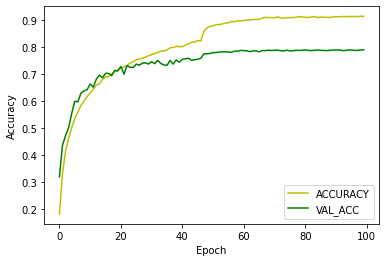

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"], 'y', label= 'ACCURACY')
plt.plot(hist.history["val_accuracy"], 'g', label= 'VAL_ACC')

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()


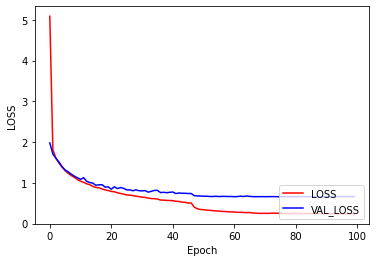

In [23]:
plt.subplot(111)
plt.plot(hist.history['loss'], 'r', label= 'LOSS')
plt.plot(hist.history["val_loss"], 'b', label= 'VAL_LOSS')
#plt.plot(test_acc, 'r', label= 'TEST_ACC')
plt.ylabel("LOSS")
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()